In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verify the shape of the one-hot encoded labels
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

#Kshitiz Bhargava 21BCE2067

Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)


In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Define the loss function and optimizer
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Prepare metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')
val_accuracy = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy')
#Kshitiz Bhargava 21BCE2067

/Users/kshitiz/Documents/GitHub/Programming/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)
#Kshitiz Bhargava 21BCE2067

In [4]:
# Validation step function
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_accuracy(labels, predictions)

# Training loop
EPOCHS = 10
BATCH_SIZE = 32

# Create TensorFlow datasets from the data
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

# Initialize history to track metrics
history = {'accuracy': [], 'val_accuracy': []}
#Kshitiz Bhargava 21BCE2067

In [5]:
# Run training and validation
for epoch in range(EPOCHS):
    # Reset the metrics at the start of each epoch
    train_loss.reset_state()
    train_accuracy.reset_state()
    val_accuracy.reset_state()

    for images, labels in train_dataset:
        train_step(images, labels)

    for val_images, val_labels in val_dataset:
        val_step(val_images, val_labels)

    history['accuracy'].append(train_accuracy.result().numpy())
    history['val_accuracy'].append(val_accuracy.result().numpy())

    print(f'Epoch {epoch + 1}, '
          f'Loss: {train_loss.result()}, '
          f'Training Accuracy: {train_accuracy.result() * 100:.2f}, '
          f'Validation Accuracy: {val_accuracy.result() * 100:.2f}')
#Kshitiz Bhargava 21BCE2067

2024-08-06 21:14:32.674590: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-06 21:14:32.833151: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Loss: 0.23657473921775818, Training Accuracy: 93.08, Validation Accuracy: 96.38


2024-08-06 21:14:34.584394: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Loss: 0.09997988492250443, Training Accuracy: 97.00, Validation Accuracy: 96.82
Epoch 3, Loss: 0.07128965109586716, Training Accuracy: 97.79, Validation Accuracy: 97.27


2024-08-06 21:14:38.266007: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Loss: 0.05557756870985031, Training Accuracy: 98.21, Validation Accuracy: 97.69
Epoch 5, Loss: 0.043274156749248505, Training Accuracy: 98.58, Validation Accuracy: 97.72
Epoch 6, Loss: 0.03546176478266716, Training Accuracy: 98.81, Validation Accuracy: 97.49
Epoch 7, Loss: 0.02759195677936077, Training Accuracy: 99.06, Validation Accuracy: 97.86


2024-08-06 21:14:45.170360: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Loss: 0.02525280974805355, Training Accuracy: 99.18, Validation Accuracy: 97.38
Epoch 9, Loss: 0.021343696862459183, Training Accuracy: 99.28, Validation Accuracy: 97.83
Epoch 10, Loss: 0.01920885406434536, Training Accuracy: 99.35, Validation Accuracy: 97.73


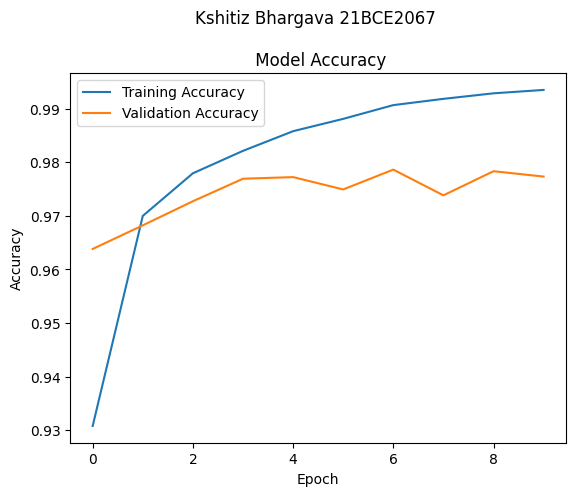

In [6]:
# Plotting accuracy history
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Kshitiz Bhargava 21BCE2067 \n\n Model Accuracy')
plt.show()
#Kshitiz Bhargava 21BCE2067